In [1]:
import os 
os.chdir("../src")
print(os.getcwd())
import copy

import numpy as np
import pandas as pd
import gym
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.utils import io

from envs.goal_demo_wrapper import GoalDemoWrapper
from utils.load_confs import load_parameters, load_paths
from her_demo.plotting_utils import get_expert_perfs, combine_eval_logs, plot_algo_with_demo, plot_goal_dist, plot_ep_lens

%matplotlib inline
%load_ext autoreload
%autoreload 2

/scratch/cluster/clw4542/dshape/src


In [2]:
ENV_IDS = [
           "Reacher-v2",
           "Swimmer-v2", 
           "Ant-v2", 
           "Hopper-v2", 
           "Walker2d-v2", 
           "HalfCheetah-v2"
          ]

paths = load_paths()
params = load_parameters()

RESULTS_DIR = paths['rl_demo']['results_dir']
expt_name = "her_demo"
algo = "td3"

# control variables
time_feat = True
displace_t = 1

In [3]:
expert_perf, _ = get_expert_perfs()
expert_perf["Reacher-v2"].keys()

dict_keys(['optimal', 'medium', 'worst', 'random'])

## Core Result

In [6]:
ENV_IDS = [
           "Reacher-v2",
           "Swimmer-v2", 
           "Ant-v2", 
           "Hopper-v2", 
           "HalfCheetah-v2",
          ]
algo_colors = {
    # core
    "TD3": "C0", # blue
    "D-Shape (ours)": "C1", # orange
    "TD3+PBRS": "C2", # green

    # vary demo
    "best demo": "C0", # blue
    "medium demo": "C1", # orange
    "worst demo": "C2", # green
    "random demo": "C3", # red

    "D-Shape, demo=best": "C0",
    "D-Shape, demo=medium": "C1",
    "D-Shape, demo=worst": "C2",
    "D-Shape, demo=random": "C3",    
}
fig_locs = {env_id: i for i, env_id in enumerate(ENV_IDS)}

gss = "random"
sparse_rew = False
sin_cos_repr = False # MAY NEED TO get this from params later
raw, obs_type = False, "raw" # True

plot_settings = {
    "normalize": False,
    "run_ids": [1,2,3,4,5],
}

/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


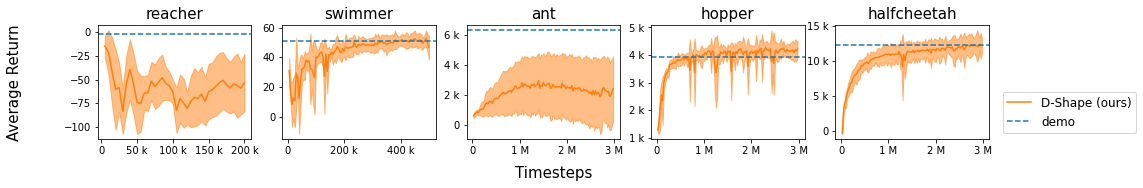

In [87]:
# core result
for demo_level in ["optimal"]:
    figure, axis = plt.subplots(1,len(ENV_IDS), figsize=(11,2.1))
    for env_id in ENV_IDS:
        plot_settings["demo_level"] = demo_level
        plot_settings["env_id"] = env_id
        
        eval_data_dict = {
#                   f"TD3": combine_eval_logs(f"{RESULTS_DIR}/time_feature_rl_sparse-rew={sparse_rew}/log/{algo}_{env_id}", **plot_settings),        
#                   f"TD3+PBRS": combine_eval_logs(f"{RESULTS_DIR}/potential_dense_time_feat_rl_demo={demo_level}_sparse-rew={sparse_rew}/log/{algo}_{env_id}", **plot_settings),                                     
                  f"D-Shape (ours)": combine_eval_logs(f"{RESULTS_DIR}/dshape_algo=td3_rew=potential_dense_raw={raw}_gss={gss}_n-goal=10_demo={demo_level}_sparse-rew={sparse_rew}_sin-cos-repr={sin_cos_repr}/log/{algo}_{env_id}", **plot_settings),   
        }
        plot_algo_with_demo(eval_data_dict, 
                            axis=axis[fig_locs[env_id]],
                            demo_level=demo_level,
                            env_id=env_id, 
                            algo_colors=algo_colors,
                            eval_mode=True,
                            normalize=plot_settings["normalize"]
                           )
#     figure.suptitle(f"Goal strategy={goal_strat}, demo={demo_level}\n",
#                    fontsize=15)
    figure.text(0.70, -0.1, "Timesteps", 
                ha='center', va='center',
                fontsize=15
               )
    figure.text(0.02, 0.5, "Average Return", 
                ha='center', va='center', rotation='vertical',
                fontsize=15
               )
    
    axis[fig_locs[env_id]].legend(fontsize=12, 
                                  bbox_to_anchor=(2, 0.0), 
                                  loc='lower right')
    
    figure.subplots_adjust(right=1.25, left=0.125, 
                           wspace= 0.20)

    figure.show()
#     figure.savefig(f"../figures/core_goal-strat={goal_strat}_demo={demo_level}.pdf", bbox_inches="tight")